In [44]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
# from sklearn.metrics import jaccard_similarity_score

##　数据下载

这份数据是之前在知乎看到的，放一下链接和下载链接
［知乎链接］（https://zhuanlan.zhihu.com/p/95518858）
［下载链接］（https://link.zhihu.com/?target=https%3A//github.com/akkaze/datasets/raw/master/m2nist.zip）

#＃　数据介绍和EDA

数据主要由三部分构成，分别是
1. `combined.npy` 数字图片
2. `segmented.npy` 掩码图片
3. `bbox.txt` 数字的box位置和数字的值，0-10

In [110]:
data_dir = 'data/m2nist'
X = np.load(f'{data_dir}/combined.npy')
y = np.load(f'{data_dir}/segmented.npy')

SEGMENTATION_TYPE = ['ALL_DIGITS', 'BINARY'][0]
if SEGMENTATION_TYPE == 'BINARY':
    num_classes = 2
    # Collapse per-pixel labels into digit vs non-digit.
    y = np.max(y,axis=3)
    y=np.stack((y==1,y==0),axis=-1)
elif SEGMENTATION_TYPE == 'ALL_DIGITS':
    num_classes = 10

数字图片和掩码图片各自5000张，长宽为64x84

In [111]:
print(X.shape, y.shape)

(5000, 64, 84) (5000, 64, 84)


In [112]:
X = X.astype(np.float32)
y = y.astype(np.float32)

#Shuffle
X,y = shuffle(X,y)
#
# Normalize
# X -= 127.0
# X /= 127.0



## 数据可视化
随机获取10张图片，分别可视化“数字+掩码”，“数字”，“掩码”
可以看到，每张图中至少有两个数字，但是有点mask中是没有数字的

In [91]:
indices = np.random.randint(low=0, high=len(X), size=n)

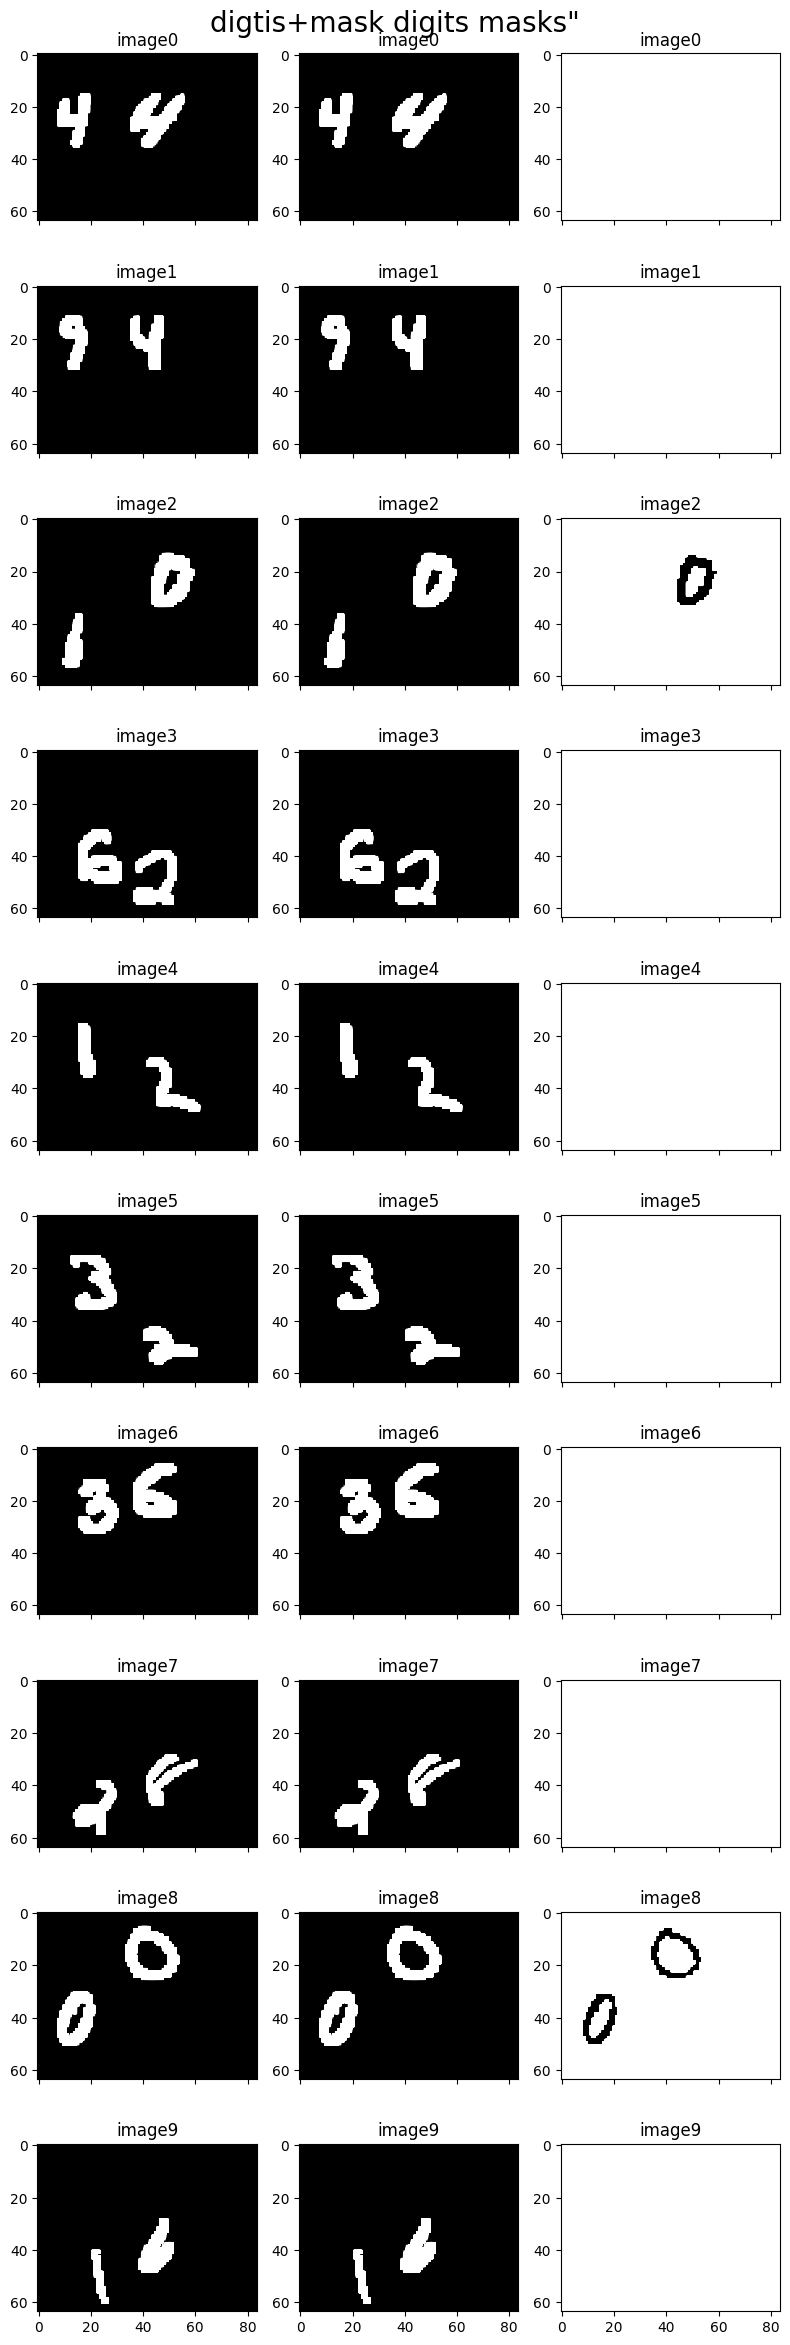

In [96]:
def vis_graph(X,y,n = 10, opacity = 0): # 标注区域透明度

    fig, axes = plt.subplots(nrows=n, ncols=3, sharex=True, figsize=(8,12*n/5))
    fig.dpi = 100

    for index, (img, mask) in enumerate(zip(X, y)):
        axes[ index,0].imshow(img, cmap='gray', vmin=0, vmax=1)
        axes[ index,0].imshow(mask*10, alpha=opacity, cmap='gray', vmin=0, vmax=1)
        axes[ index,0].set_title(f"image{index}")
        axes[ index,1].imshow(img, cmap='gray', vmin=0, vmax=1)
        axes[ index,1].set_title(f"image{index}")
        axes[ index,2].imshow(mask*10, cmap='gray', vmin=0, vmax=1)
        axes[ index,2].set_title(f"image{index}")

    fig.suptitle('digtis+mask digits masks', fontsize=20)
    plt.tight_layout()
    plt.show()

vis_graph(X[indices], y[indices])

可以看到，含有0的值，都是有mask的，这个数据集，把掩码用0表示，其他的数字是一些灰色边界值

In [93]:
for i in y[indices]:
    print(np.unique(i))

[ 4. 10.]
[ 4.  9. 10.]
[ 0.  6. 10.]
[ 2.  6. 10.]
[ 1.  2. 10.]
[ 2.  3. 10.]
[ 3.  6. 10.]
[ 2.  8. 10.]
[ 0. 10.]
[ 1.  6. 10.]


## 查看文本数据

In [79]:
count_line = 20
count_ = 0
with open('data/m2nist/bbox.txt','r') as f:
    # print(f.readlines())
    for line in f.readlines():
        line = line.strip('\n')
        print(line)
        count_+=1
        if count_==count_line:
            break

0	12,18,36,40,2	33,27,53,51,9
1	36,19,60,43,4	8,34,32,56,7
2	34,35,56,59,3	2,18,26,42,7
3	10,5,20,29,1	34,20,56,44,6
4	33,27,53,51,4	8,11,27,35,7
5	35,37,57,61,7	7,35,25,59,9
6	20,11,28,35,1	39,9,59,33,3
7	36,38,60,58,0	9,19,23,43,6
8	10,17,27,41,1	32,13,56,37,3
9	6,21,26,45,2	42,3,59,27,4
10	3,2,27,26,0	38,6,62,26,5
11	34,3,58,27,3	4,4,26,28,6
12	18,26,30,50,1	45,15,61,39,6
13	32,36,56,60,3	4,20,28,44,7
14	8,26,24,50,1	39,39,53,63,7
15	35,18,59,42,0	15,13,29,37,1	58,36,82,60,4
16	2,23,26,47,3	37,38,61,62,4
17	32,35,52,59,7	4,15,27,39,9
18	32,11,53,35,1	12,28,33,52,9
19	39,19,60,43,0	8,40,26,63,9


可以发现，每一行都是有行号的，从零开始
每一行，至少有十个数字，最多是15个有效数字，五个数字一组，分别代表着四个角度坐标和数字值
因为我们主要做的事语义分割，这里就不多对该文件探索和使用，但是可以以后作为一个coco格式的数据的





## 划分数据集

In [ ]:
import os
import random

In [113]:
#Shuffle
X,y = shuffle(X,y)
print(X.shape,y.shape,type(X))

(5000, 64, 84) (5000, 64, 84) <class 'numpy.ndarray'>


In [114]:
y[1,:,:]

array([[10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       ...,
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.]], dtype=float32)

In [115]:
sel_list = []
for i in range(len(X)):
    if np.any(y[i,:,:]==0):
        sel_list.append(i)
print(len(sel_list))

922


In [117]:
X,y = X[sel_list,:,:],y[sel_list,:,:]
print(X.shape,y.shape)

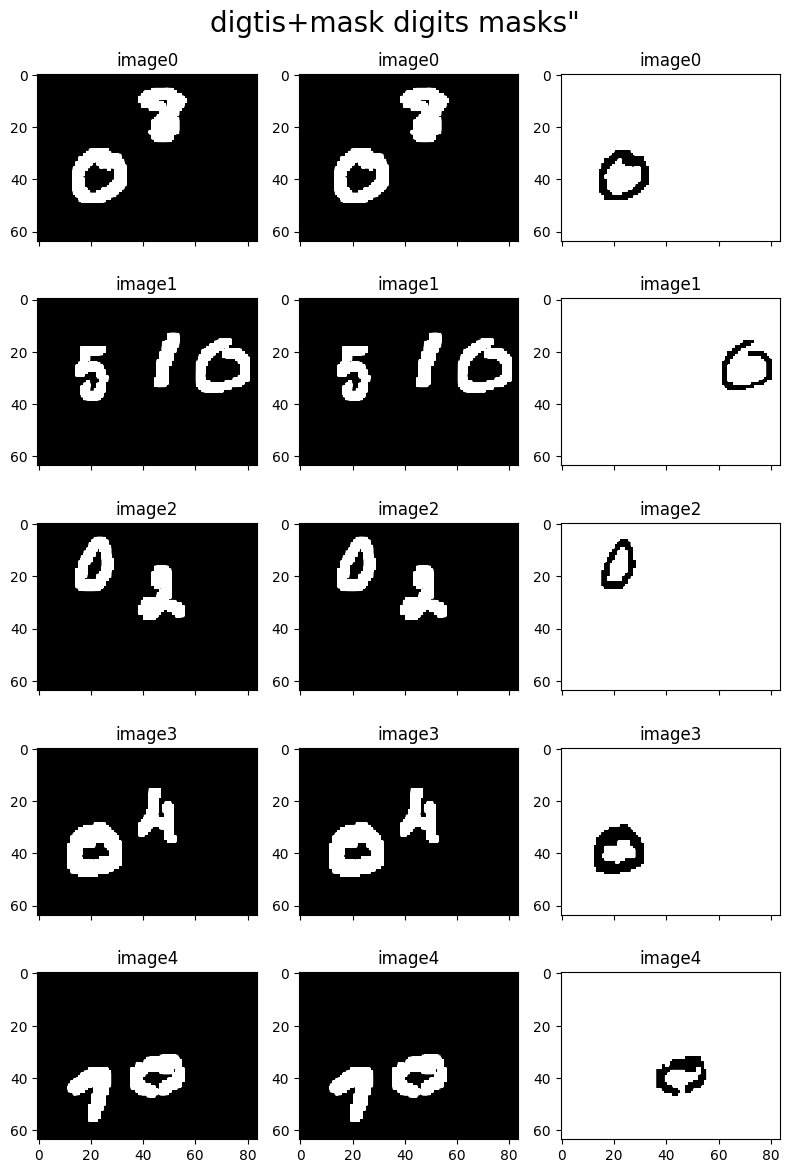

In [123]:
num_show = 5
vis_graph(X[:num_show,:,:],y[:num_show,:,:],n=num_show)

In [ ]:
train_ratio = 0.8
test_ratio = 1 - train_ratio
all_file_num = len(X)

In [ ]:
train_X, train_y = X[:int(all_file_num*train_ratio)], y[:int(all_file_num*train_ratio)]
test_X, test_y  = X[int(all_file_num*train_ratio):], y[int(all_file_num*train_ratio):]

print('数据集图像总数', all_file_num)
print('训练集划分比例', train_ratio)
print('训练集图像个数', len(train_X))
print('测试集图像个数', len(test_X))